In [1]:
import pandas as pd
import json

In [2]:
%matplotlib inline

# Load data from json

In [9]:
DATA_PATH = 'data/lesetagebuch-florian.json'
df = pd.read_json(DATA_PATH)
df

,entries,name,url,username
0,"{'book': {'author': {'id': 9898, 'name': 'Fran...",Florian,/von/florian,florian
1,"{'book': {'author': {'id': 2757, 'name': 'Step...",Florian,/von/florian,florian
2,"{'book': {'author': {'id': 56, 'name': 'Benedi...",Florian,/von/florian,florian
3,"{'book': {'author': {'id': 632, 'name': 'Rober...",Florian,/von/florian,florian
4,"{'book': {'author': {'id': 8601, 'name': 'Mike...",Florian,/von/florian,florian
...,...,...,...,...
154,"{'book': {'author': {'id': 278, 'name': 'Sam W...",Florian,/von/florian,florian
155,"{'book': {'author': {'id': 24, 'name': 'Malcol...",Florian,/von/florian,florian
156,"{'book': {'author': {'id': 12, 'name': 'Volker...",Florian,/von/florian,florian
157,"{'book': {'author': {'id': 2477, 'name': 'Jose...",Florian,/von/florian,florian


In [10]:
with open(DATA_PATH) as fp:
    books = json.load(fp)


# Set up dataframe with desired structure and types

In [11]:
books['entries'][0]

{'book': {'author': {'id': 9898,
   'name': 'François Chollet',
   'url': '/autor/fran%C3%A7ois-chollet'},
  'id': 21280,
  'pages': 384,
  'title': 'Deep Learning with Python',
  'url': '/buch/deep-learning-with-python'},
 'book_type': 'book',
 'comment': "A book about deep learning that really caters to my preferred learning style: It covers a lot of real-world applications (text analysis, sentiment analysis, vision, ...) and provides clear and practical code examples that invite you to try for yourself. Ultimately, trying it out and building something yourself is the way to _really_ grasp the concepts, I think, and this book does a really good job at it.\r\n\r\nWhile Francois Chollet does give some introduction in the beginning, it may be too little for the complete beginner. For anyone starting at a slightly-above beginner to intermediate level, I'd wholeheartedly recommend this book to learn Deep Learning with Python.",
 'date': '2020-01-15',
 'id': 39095,
 'pinned': False,
 'priv

In [12]:
def _author_gender(tags):
    gender_tags = {
        'author_m': 'Male',
        'author_f': 'Female',
        'author_d': 'Diverse / Multiple',
    }
    for tag in tags:
        if tag.lower() in gender_tags:
            return gender_tags[tag]
    return 'Unknown'

def _language(tags):
    for lang in ('German', 'English'):
        if lang.lower() in tags:
            return lang
    return 'Unknown'

drop_keys = ['book', 'user']
books_flat = [
    {
        **{k:v for k, v in book.items() if k not in drop_keys},
        **{
            'author': book['book']['author']['name'],
            'title': book['book']['title'],
            'book_pages': book['book']['pages'],
            'username': book['user']['username'],
            'language': _language(book.get('tags')),
            'author_gender': _author_gender(book.get('tags'))
         }
    }
    for book in books['entries']
]

df = pd.DataFrame(books_flat)
df['date'] = df.date.str.replace('00', '01')  # fallback dates were day not specified
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,book_type,comment,date,id,pinned,private,rating,tags,type,url,author,title,book_pages,username,language,author_gender
0,book,A book about deep learning that really caters ...,2020-01-15,39095,False,False,5.0,"[author_m, english, coding]",finished,/eintrag/39095,François Chollet,Deep Learning with Python,384,florian,English,Male
1,audio_book,The first time I really leaned into Greek myth...,2020-12-15,39094,False,False,4.0,"[english, fiction, author_m]",finished,/eintrag/39094,Stephen Fry,Mythos,448,florian,English,Male
2,book,Unglaublich schön geschrieben. Hätte fast eine...,2020-12-22,39092,False,False,5.0,"[german, fiction, novel, author_m]",finished,/eintrag/39092,Benedict Wells,Vom Ende der Einsamkeit,355,florian,German,Male
3,book,"Wow, what a story. \r\n\r\nI was only vaguely ...",2020-11-30,38938,False,False,4.0,"[english, history, author_m]",finished,/eintrag/38938,Robert Harris,Selling Hitler,400,florian,English,Male
4,book,The story of astrophysicist Mike Brown whose c...,2020-11-21,38797,False,False,5.0,"[english, science, author_m]",finished,/eintrag/38797,Mike Brown,How I Killed Pluto and Why It Had It Coming,288,florian,English,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,book,Some kind of biography about Richard Stallman ...,2013-02-12,1457,False,False,4.0,[],finished,/eintrag/1457,Sam Williams,Free as in Freedom,264,florian,Unknown,Unknown
155,book,"Interessant zu erfahren, dass manchmal eine sp...",2013-01-23,1019,False,False,3.0,[],finished,/eintrag/1019,Malcolm Gladwell,Blink!,304,florian,Unknown,Unknown
156,book,Tolle Atmosphäre im Berlin der 1920er Jahre. S...,2013-01-07,1004,False,False,4.0,[],finished,/eintrag/1004,Volker Kutscher,Der nasse Fisch,560,florian,Unknown,Unknown
157,book,None,2015-01-19,992,False,False,NaN,[],wished,/eintrag/992,Joseph Campbell,The Hero with a Thousand Faces,418,florian,Unknown,Unknown


In [13]:
df.dtypes

book_type                object
comment                  object
date             datetime64[ns]
id                        int64
pinned                     bool
private                    bool
rating                  float64
tags                     object
type                     object
url                      object
author                   object
title                    object
book_pages                int64
username                 object
language                 object
author_gender            object
dtype: object

#  Mostly paper books, few audio books

In [14]:
# df.book_type.value_counts().plot(kind='pie', leg)

# How many books per year

In [16]:
yearly_stats = (
    df.assign(
        year=lambda entry: entry['date'].dt.year
    )
    .groupby('year')[['title', 'book_pages']]
).agg({
    'title': 'count',
    'book_pages': 'sum'
})
yearly_stats

,title,book_pages
year,,
2013,24,6237
2014,13,4688
2015,10,3745
2016,16,6320
2017,23,8161
2018,20,6458
2019,29,9727
2020,24,9678


## How many _books_ have I read each year?

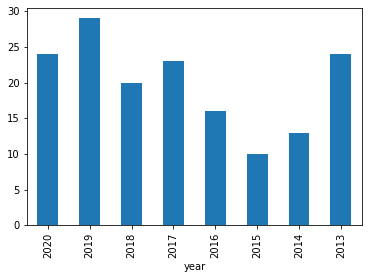

In [17]:
yearly_stats['title'].sort_index(ascending=False).plot(kind='bar')

## How many _pages_ have I read each year?

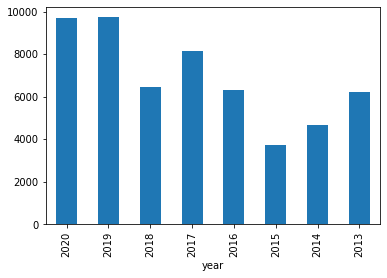

In [18]:
yearly_stats['book_pages'].sort_index(ascending=False).plot(kind='bar')

# What's the month where I read the most?

In [19]:
years = df.assign(
    year=lambda entry: entry['date'].dt.year
)['year']
num_years = len(years.unique())
num_years

8

In [22]:
monthly_stats = (
    df.assign(
        month=lambda entry: entry['date'].dt.month
    )
    .groupby('month')[['title', 'book_pages']]
).agg({
    'title': 'count',  # FIXME: I need the mean of the count instead!
    'book_pages': 'mean'
}).rename(
    columns={
        'title': 'books_num_total',
        'book_pages': 'pages_per_month'
    }
).assign(
    books_per_month=lambda entry: (entry['books_num_total'] / num_years)
)[
    ['pages_per_month', 'books_per_month']
]
monthly_stats

,pages_per_month,books_per_month
month,,
1,304.500000,2.250
2,382.941176,2.125
3,394.500000,0.750
4,419.444444,1.125
5,423.000000,1.000
6,426.800000,0.625
7,315.777778,1.125
8,331.181818,1.375
9,406.562500,2.000


## December is when I read most books
...to hit the reading goal?

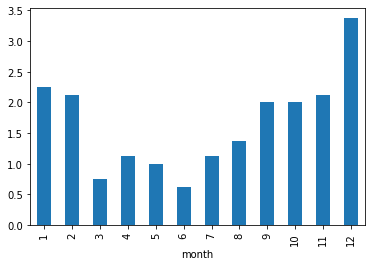

In [23]:
monthly_stats['books_per_month'].sort_index().plot(kind='bar')

## However, books read in December are shorter on average
Is it easier to hit the reading goal that way?

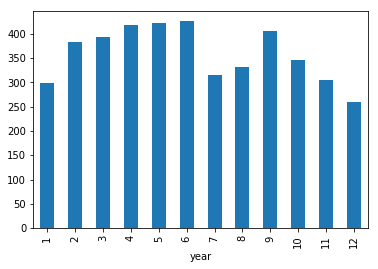

In [15]:
monthly_stats['pages_per_month'].sort_index().plot(kind='bar')

In [16]:
# Do I like the books I read?

# Ratings

/Users/flo/projects/data-playground/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


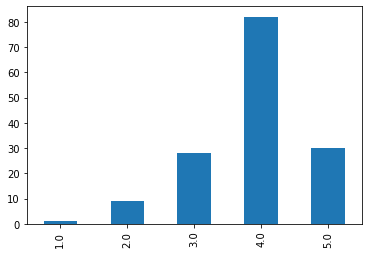

In [24]:
df_rated = (
    df
    [df.rating.notnull()]
    [df.rating>0]
)
df_rated.rating.value_counts().sort_index().plot(kind='bar')

In [25]:
# Odd: some non-rated books have rating None, some have rating 0.0
print(len(df[df.rating.isna()]))
print(len(df[df.rating.isnull()]))
print(len(df[df.rating==0.0]))
df[df.rating==0.0]

3
3
6


,book_type,comment,date,id,pinned,private,rating,tags,type,url,author,title,book_pages,username,language,author_gender
18,book,"Read this as part of our ""Data Science Study G...",2020-07-13,37486,False,False,0.0,"[english, science, tech, author_m, coding]",finished,/eintrag/37486,Steven S. Skiena,The Data Science Design Manual,445,florian,English,Male
62,book,"After a couple of non-fiction books, I wanted ...",2018-11-24,29202,False,False,0.0,"[english, novel]",finished,/eintrag/29202,Ben Aaronovitch,Rivers Of London,395,florian,English,Unknown
69,book,"Karl Jäger, von seinen Nachbarn als feinsinnig...",2018-02-19,22414,False,False,0.0,"[german, biography, history, ww2]",finished,/eintrag/22414,Wolfram Wette,Karl Jäger,288,florian,German,Unknown
70,book,"Es gibt so viel aus der deutschen Geschichte, ...",2018-02-11,22299,False,False,0.0,"[german, history, philosophy, ww2, biography]",finished,/eintrag/22299,Hannah Arendt,Eichmann in Jerusalem: Ein Bericht von der Ban...,448,florian,German,Unknown
71,book,"Spannende Rechercheergebnisse, wie die deutsch...",2018-01-25,22298,False,False,0.0,"[german, history, ww2]",finished,/eintrag/22298,Ernst Klee,Persilscheine und falsche Pässe,191,florian,German,Unknown
99,book,None,2016-11-09,15190,False,False,0.0,[],wished,/eintrag/15190,Jeffrey Eugenides,Middlesex,596,florian,Unknown,Unknown


## Distribution of book lengths

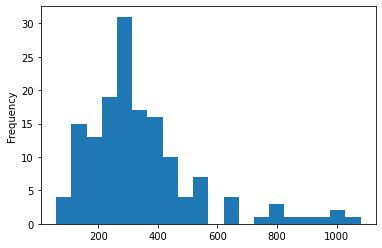

In [26]:
df_rated.book_pages.plot.hist(bins=20)

## Do I rate longer books higher?

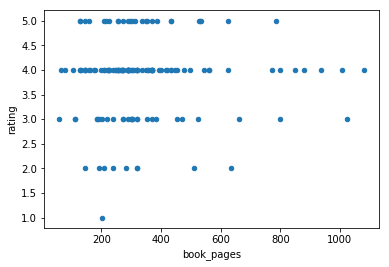

In [20]:
df_rated.plot.scatter(x='book_pages', y='rating')

# Split books in short / medium / long

In [27]:
# auto split is not to my taste. "long" should start later
pd.qcut(df.book_pages, 3).value_counts()

(256.0, 368.0]     56
(58.999, 256.0]    54
(368.0, 1080.0]    49
Name: book_pages, dtype: int64

In [28]:
# I want to call the middle 50% "Medium" and distribute the other lengths equally to the sides
pd.qcut(df.book_pages, [0, 0.25, 0.75, 1.]).value_counts()

(224.0, 416.0]     77
(58.999, 224.0]    43
(416.0, 1080.0]    39
Name: book_pages, dtype: int64

In [29]:
# Now actually assign some names
book_length = pd.qcut(df.book_pages, [0, 0.25, 0.75, 1.], labels=['Short', 'Medium', 'Long'])
book_length.value_counts()

Medium    77
Short     43
Long      39
Name: book_pages, dtype: int64

# How do ratings vary by book length and paper vs. audio book (pivot table!)

In [30]:
rating_per_length_and_type = df.assign(
    book_length=book_length
).pivot_table(
    values='rating',
    index='book_length',
    columns='book_type'
)
rating_per_length_and_type

book_type,audio_book,book
book_length,,
Short,NaN,3.658537
Medium,4.25,3.808219
Long,4.00,3.542857


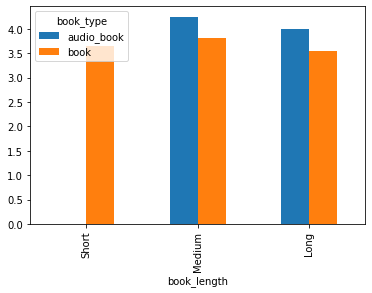

In [31]:
rating_per_length_and_type.plot.bar()

In [32]:
pages_per_rating = df_rated[
    ['rating', 'book_pages']
].groupby('rating').agg(['mean', 'std']).fillna(0)
pages_per_rating

book_pages            
              mean         std
rating                        
1.0     202.000000    0.000000
2.0     317.555556  159.232622
3.0     345.535714  208.427353
4.0     351.000000  205.839504
5.0     342.866667  149.763430

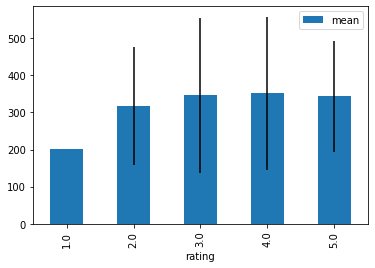

In [33]:
pages_per_rating.book_pages.plot.bar(y='mean', yerr='std')

# Do I write longer comments for longer books?

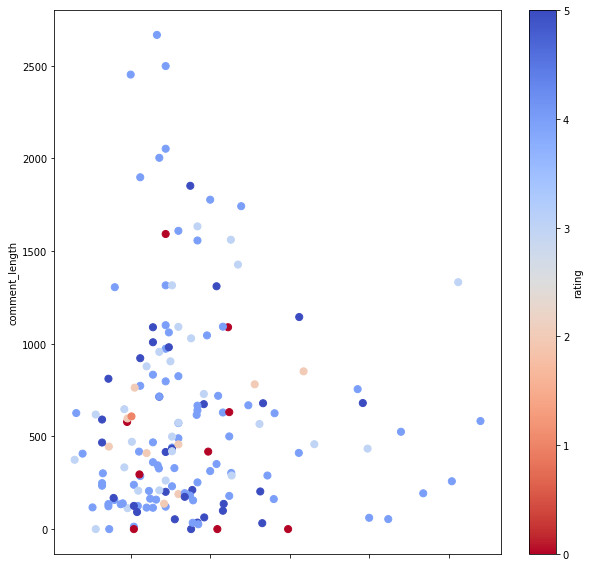

In [34]:
df.assign(
    comment_length=lambda entry: entry.comment.str.len()
).fillna(0).plot.scatter(
    x='book_pages',
    y='comment_length',
    c='rating',
    colormap='coolwarm_r',
    figsize=(10,10),
    s=50  # marker size
)

# Compare language and genre preferences over time
Currently not all books are tagged

In [35]:
table_1 = pd.pivot_table(
    df.assign(
        year=lambda entry: entry['date'].dt.year
    ),
    index='year',
    columns='language',
    
    # count number of books (=number of titles)
    values='title',
    aggfunc='count',
    
    # prepare so that we can calculate percentages in next step
    fill_value=0,
    margins=True
)
table_1

language,English,German,Unknown,All
year,,,,
2013,0,0,24,24
2014,0,0,13,13
2015,0,0,10,10
2016,0,0,16,16
2017,0,0,23,23
2018,9,11,0,20
2019,18,11,0,29
2020,18,5,1,24
All,45,27,87,159


In [36]:
# Display percentages
table_2 = table_1.div(table_1.All, axis=0)
table_2

language,English,German,Unknown,All
year,,,,
2013,0.000000,0.000000,1.000000,1.0
2014,0.000000,0.000000,1.000000,1.0
2015,0.000000,0.000000,1.000000,1.0
2016,0.000000,0.000000,1.000000,1.0
2017,0.000000,0.000000,1.000000,1.0
2018,0.450000,0.550000,0.000000,1.0
2019,0.620690,0.379310,0.000000,1.0
2020,0.750000,0.208333,0.041667,1.0
All,0.283019,0.169811,0.547170,1.0


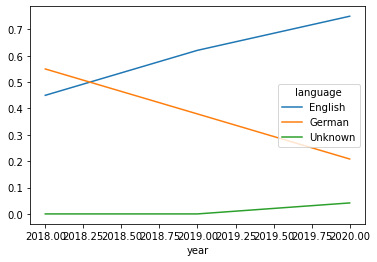

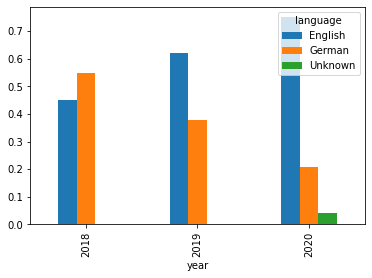

In [37]:
tagged_years = table_2.loc[
    [2018, 2019, 2020]
][
    ['English', 'German', 'Unknown']  # hide 'All'
]
tagged_years.plot.line()
tagged_years.plot.bar()

## Author gender distribution

In [40]:
table_gender_1 = pd.pivot_table(
    df.assign(
        year=lambda entry: entry['date'].dt.year
    ),
    index='year',
    columns='author_gender',
    
    # count number of books (=number of titles)
    values='title',
    aggfunc='count',
    
    # prepare so that we can calculate percentages in next step
    fill_value=0,
    margins=True
)
table_gender_1

author_gender,Diverse / Multiple,Female,Male,Unknown,All
year,,,,,
2013,0,0,0,24,24
2014,0,0,0,13,13
2015,0,0,0,10,10
2016,0,0,0,16,16
2017,0,0,0,23,23
2018,0,0,0,20,20
2019,1,5,23,0,29
2020,0,2,22,0,24
All,1,7,45,106,159


In [41]:
# Display percentages
table_gender_2 = table_gender_1.div(table_gender_1.All, axis=0)
table_gender_2

author_gender,Diverse / Multiple,Female,Male,Unknown,All
year,,,,,
2013,0.000000,0.000000,0.000000,1.000000,1.0
2014,0.000000,0.000000,0.000000,1.000000,1.0
2015,0.000000,0.000000,0.000000,1.000000,1.0
2016,0.000000,0.000000,0.000000,1.000000,1.0
2017,0.000000,0.000000,0.000000,1.000000,1.0
2018,0.000000,0.000000,0.000000,1.000000,1.0
2019,0.034483,0.172414,0.793103,0.000000,1.0
2020,0.000000,0.083333,0.916667,0.000000,1.0
All,0.006289,0.044025,0.283019,0.666667,1.0


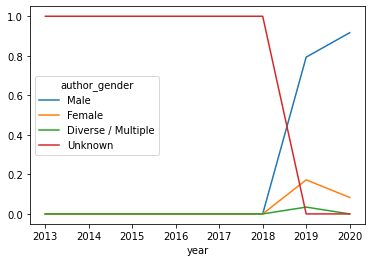

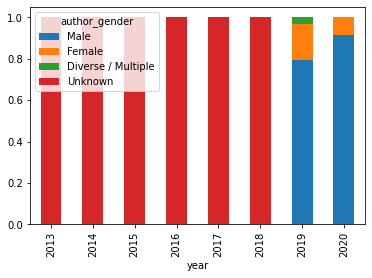

In [46]:
tagged_years = table_gender_2.loc[
    [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
][
    ['Male', 'Female', 'Diverse / Multiple', 'Unknown']  # hide 'All'
]
tagged_years.plot.line()
tagged_years.plot.bar(stacked=True)